In [1]:
from util import create_distance_matrix
import matplotlib.pyplot as plt
from homology import rips, transform_to_birth_persistence, filtered_complexes_to_tuples
import json
import numpy as np

In [2]:
def load_data():
    f = open("countries.geo.json")
    return json.load(f)

def process_geometry(data):
    # Itterate over all countries
    res = []
    for f in data['features']:
        print(f"======Working on {f['properties']['name']}========")
        geometry = f['geometry']
        points = geometry['coordinates']
        if geometry['type'] == 'MultiPolygon':
            array = points[0]
            for i in range(1, len(points)):
                array[0] += points[i][0]
            points = np.array(array)
        elif f['properties']['name'] == "South Africa":  # South Africa has a hole in its country, making it a bit odd to handle
            array = points[0]
            for i in range(1, len(points)):
                array += points[i]
            points = np.array([array])
        else:
            points = np.array(points)
        points = np.squeeze(points)

        if points.shape[0] > 20:
            print("Skipping because polygon has too many points\n")
        else:
            print("Generating distance matrix")
            distance_matrix = create_distance_matrix(points).numpy()
            print("Applying Rips")
            filtered_complex = rips(distance_matrix, dimensions=2, max_radius=.5)
            print("Done\n")
            res.append([f['properties']['name'], (filtered_complex[0].tolist(), filtered_complex[1])])
    return res

data = load_data()
processed = process_geometry(data)

======Working on Afghanistan========
Skipping because polygon has too many points

======Working on Angola========
Skipping because polygon has too many points

======Working on Albania========
Skipping because polygon has too many points

======Working on United Arab Emirates========
Skipping because polygon has too many points

======Working on Argentina========
Skipping because polygon has too many points

======Working on Armenia========
Generating distance matrix
Applying Rips
Max = 1350.0, found  = 20
0
Max = 1350.0, found  = 20
0.1
Max = 1350.0, found  = 22
0.2
Max = 1350.0, found  = 31
0.30000000000000004
Max = 1350.0, found  = 54
0.4
Max = 1350.0, found  = 91
0.5
Max = 1350.0, found  = 146
Done

======Working on Antarctica========
Skipping because polygon has too many points

======Working on French Southern and Antarctic Lands========
Generating distance matrix
Applying Rips
Max = 129.0, found  = 9
0
Max = 129.0, found  = 9
0.1
Max = 129.0, found  = 11
0.2
Max = 129.0, found 

KeyboardInterrupt: 

In [51]:
def save_data(data, filename):
    f = open(filename, "w")
    json.dump(data, f)

save_data(processed, "processed.geo.json")

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  31.5 31.5 31.5 31.6 31.6 31.6
 31.7 31.7 31.7 31.7 31.8 31.8 31.8 31.8 31.8 31.8 31.9 31.9 31.9 31.9
 31.9 31.9 31.9 32.  32.  32.  32.  32.  32.  32.  32.  32.  32.1 32.1
 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1
 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.3 32.3
 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3
 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4
 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.5 32.5 32.5 32.5 32.5
 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5
 32.5 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6
 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.7 32.7 32.7 32.7 32.7 32.7 32.7
 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.8 32.8 32.8 32.8 32.8
 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.9 32.9
 32.9 3

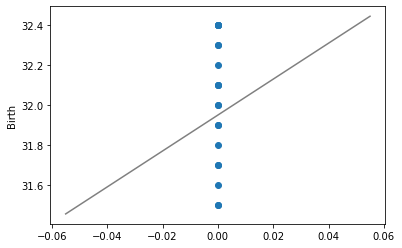

In [73]:
def create_plots(data):
    for x in data:
        tuples = filtered_complexes_to_tuples(np.array(x[1][0]), np.array(x[1][1]))
        tuples[tuples == -np.inf] = 200

        plt.scatter(tuples.T[0], tuples.T[1])
        # plt.plot(plt.xlim(), plt.ylim(), c="grey")  # This doesn't work. Need a y = x plot
        plt.ylabel("Death")
        plt.ylabel("Birth")
        break

create_plots(processed)